### Basic Practice

PyTorch is a better package   
tfdot是老師寫的視覺化套件

In [1]:
import os
import tensorflow as tf
import numpy as np 
# 下面兩個是用來輔助圖形化
from IPython.display import display
from tfdot import tfdot

In [2]:
#在tensor flow空間內建立一個常數變數
tf.constant(1234)

<tf.Tensor 'Const:0' shape=() dtype=int32>

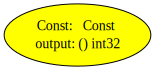

In [3]:
tfdot()


In [4]:
#浮點數, float32 是為了給GPU
tf.constant(1234.)

<tf.Tensor 'Const_1:0' shape=() dtype=float32>

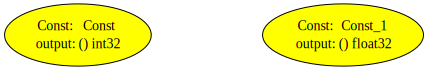

In [5]:
tfdot()

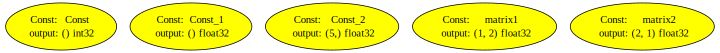

In [6]:
tf.constant([1,2,3,4,5.])
matrix1 = tf.constant([[100., 80.]],name='matrix1')
matrix2 = tf.constant([[2.],[2.]], name='matrix2')
tfdot()

matrix1, matrix2是python空間內的名字, 可以用name=''在tensorflow空間內定義名字

### tensor 矩陣乘法, 
加權總和,   
目前的操作都是畫藍圖, 因為要讓多個cpu gpu並行處理, 所以需要先畫藍圖   
圖只是描述邏輯, 並沒有真正的做執行   

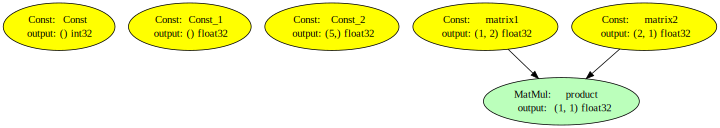

In [7]:
product = tf.matmul(matrix1,matrix2,name='product')
tfdot()

In [8]:
product

<tf.Tensor 'product:0' shape=(1, 1) dtype=float32>

In [9]:
product.op

<tf.Operation 'product' type=MatMul>

In [10]:
product2 = matrix1*matrix2
matrix1+matrix2
absxx = tf.abs(matrix1)

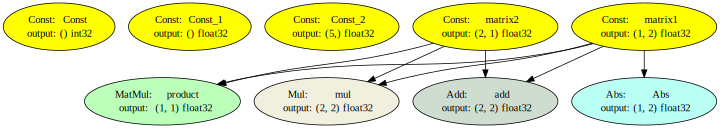

In [11]:
tfdot()

可以把圖叫出來

In [12]:
product.graph

In [13]:
graph = tf.get_default_graph()
graph.get_operations()

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'matrix1' type=Const>,
 <tf.Operation 'matrix2' type=Const>,
 <tf.Operation 'product' type=MatMul>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Abs' type=Abs>]

In [14]:
product.op.outputs

[<tf.Tensor 'product:0' shape=(1, 1) dtype=float32>]

In [15]:
product

<tf.Tensor 'product:0' shape=(1, 1) dtype=float32>

In [16]:
graph=tf.get_default_graph()
graph.get_tensor_by_name('product:0')

<tf.Tensor 'product:0' shape=(1, 1) dtype=float32>

### 執行 
session (操作階段)(在某個機器上定義一個執行的地方 cpu or gpu)
把圖丟給session執行

1. 建立session


In [17]:
sess=tf.Session()

In [18]:
sess.run(product)

array([[ 360.]], dtype=float32)

In [19]:
sess.run(matrix1)

array([[ 100.,   80.]], dtype=float32)

In [20]:
sess.run(absxx)

array([[ 100.,   80.]], dtype=float32)

In [21]:
sess.run(matrix1)

array([[ 100.,   80.]], dtype=float32)

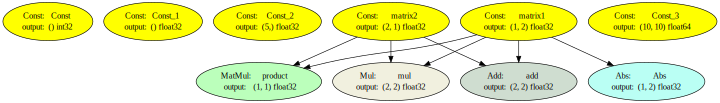

In [22]:
r = tf.constant(np.random.uniform(size=(10,10)))
tfdot()

In [23]:
sess.run(r)

array([[ 0.41909706,  0.15078236,  0.35481994,  0.33208983,  0.74786387,
         0.17626014,  0.64834073,  0.77990088,  0.02887028,  0.6314544 ],
       [ 0.20675233,  0.24165008,  0.28661934,  0.93148491,  0.72857519,
         0.86330494,  0.75266291,  0.12022585,  0.91414497,  0.53984434],
       [ 0.84474536,  0.02882015,  0.79444207,  0.90165736,  0.33394199,
         0.82398616,  0.96398586,  0.59913214,  0.77223736,  0.30461876],
       [ 0.60505876,  0.99815763,  0.91313235,  0.84261618,  0.32744606,
         0.90635988,  0.75495863,  0.68245529,  0.17381573,  0.3288522 ],
       [ 0.26161826,  0.63449627,  0.78549151,  0.96734285,  0.11345169,
         0.40219651,  0.08235058,  0.14139307,  0.44786467,  0.49485518],
       [ 0.17354473,  0.28606095,  0.54726257,  0.09979559,  0.82625412,
         0.55551858,  0.53095559,  0.83856546,  0.04489374,  0.90717991],
       [ 0.46686009,  0.59897253,  0.13494805,  0.47737024,  0.8026729 ,
         0.32169207,  0.46095803,  0.6792167 

In [24]:
sess.run(product2)

array([[ 200.,  160.],
       [ 200.,  160.]], dtype=float32)

In [25]:
(r*2+5)**2  # 等價於後面這串 tf.pow(tf.add( tf.multiply(r, tf.constant(2)), tf.constant(5)), tf.constant(2))

<tf.Tensor 'pow:0' shape=(10, 10) dtype=float64>

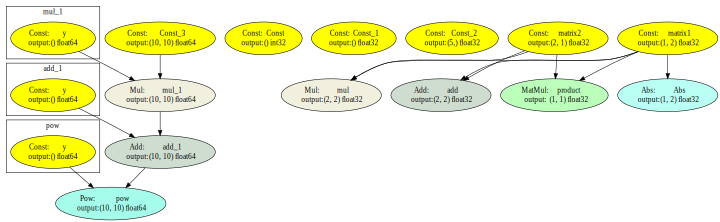

In [26]:
tfdot()

避免佔據記憶體, 每次執行完要記得執行sess.close(), 或使用context session做法 / interactive session

In [93]:
sess.close()

In [28]:
#Context的做法
with tf.Session() as sess:
    retult = sess.run(product)
    print(retult)

[[ 360.]]


In [29]:
with tf.Session():
    print(product.eval())
    print(product2.eval())

[[ 360.]]
[[ 200.  160.]
 [ 200.  160.]]


In [30]:
#指定sess為預設session
sess = tf.InteractiveSession()
product.eval()

array([[ 360.]], dtype=float32)

In [31]:
#可以把圖叫出來, 然後run所有operation
graph = tf.get_default_graph()
graph.get_operations()



[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'matrix1' type=Const>,
 <tf.Operation 'matrix2' type=Const>,
 <tf.Operation 'product' type=MatMul>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Abs' type=Abs>,
 <tf.Operation 'Const_3' type=Const>,
 <tf.Operation 'mul_1/y' type=Const>,
 <tf.Operation 'mul_1' type=Mul>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=Add>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>]

## 作業：計算從1累加到10

result=tf.constant(0)
for i in range(11):
    tf.constant(i)
    result = tf.add(result,i)

sess.run(result)

tfdot()

### 目標二：建立Place Holder, 然後丟資料進去

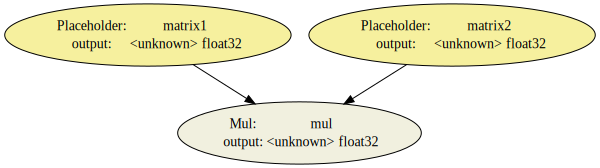

In [91]:
tf.reset_default_graph()
matrix1 = tf.placeholder(tf.float32, name='matrix1')
matrix2 = tf.placeholder(tf.float32, name='matrix2')
output = matrix1 * matrix2
tfdot()

In [95]:
sess=tf.Session()
sess.run(output, feed_dict={matrix1:1, matrix2:2})
#output.eval({matrix1:1, matrix2:2})
#feed_dict

2.0

In [96]:
sess.run(output, feed_dict={matrix1:[1,2,3], matrix2:[4,5,6]})

array([  4.,  10.,  18.], dtype=float32)

In [98]:
sess = tf.InteractiveSession()

In [99]:
output.eval({matrix1:[1,2,3], matrix2:[4,5,6]})

array([  4.,  10.,  18.], dtype=float32)

### 目標三：在session內建立變數

變數的值可以更改
因為數據的傳輸很貴, Variable可以在tensorflow的空間設一個變數, 避免數據來回傳輸

*** 
初始variable為0   
read讀取出來和1相加   
assign new value給Variable  

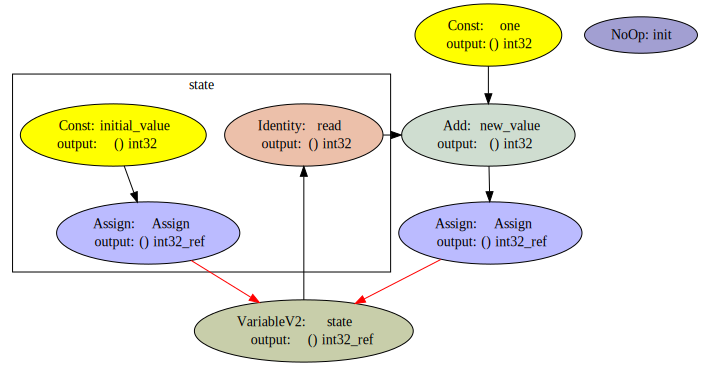

In [36]:
tf.reset_default_graph()
sess=tf.Session()
state = tf.Variable(0, name='state')
# 新的節點 計數器+1
new_value =  tf.add(state, tf.constant(1, name='one'), name='new_value')
# 更新 state
update = tf.assign(state, new_value)
# 變數初始化，這也是一個節點
init_op = tf.global_variables_initializer()
tfdot()

In [73]:
sess.run(init_op)
sess.run(update)
sess.run(state)

24

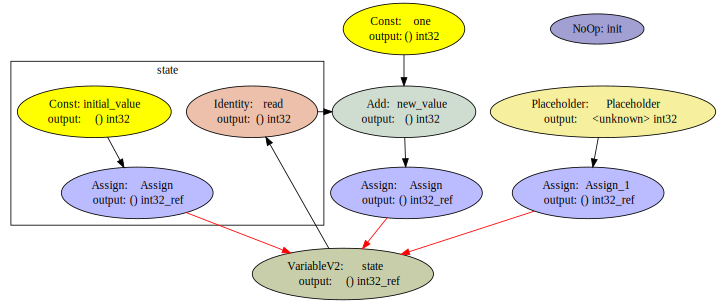

In [37]:
tf.reset_default_graph()
sess=tf.Session()
state = tf.Variable(0, name='state')
x=tf.placeholder(tf.int32)

# 新的節點 計數器+1
new_value =  tf.add(state, tf.constant(1, name='one'), name='new_value')
# 更新 state
update = tf.assign(state, new_value)
update2 = tf.assign(state, x)

# 變數初始化，這也是一個節點
init_op = tf.global_variables_initializer()
tfdot()

In [85]:
sess.run(update2,feed_dict={x:9})

9

In [81]:
sess.run(update)

12

In [86]:
sess.run(state)

9